In [393]:
import pandas as pd
import matplotlib.pyplot as plt

from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [394]:
df = pd.read_csv("./climate.csv", sep=',')

In [395]:
df['Country'] = df['Country'].astype('string')

df.set_index('Country', inplace=True)

df.head(2)

,Exposure to impact Land area where elevation is below 5 meters % of land area 2010,Exposure to impact Population living in areas where elevation is below 5 meters % of total population 2010,"Exposure to impact Population affected by droughts, floods, and extreme temperatures average annual; % of total population 2009",Exposure to impact Urban land area where elevation is below 5 meters % of urban land area 2010,Exposure to impact Rural population living in areas where elevation is below 5 meters % of rural population 2010,Exposure to impact Rural land area where elevation is below 5 meters % of rural land area 2010,Exposure to impact Urban population living in areas where elevation is below 5 meters % of urban population 2010,"Resilience Disaster risk reduction progress score 1, worst to 5,best 2011"
Country,,,,,,,,
Afghanistan,NaN,NaN,1.1,NaN,NaN,NaN,NaN,NaN
Albania,4.9,7.1,5.3,0.3,4.7,4.6,2.4,NaN


In [396]:
new_columns = [
    'Land Below 5m',
    'Population Below 5m',
    'Disaster Affected Population',
    'Urban Land Below 5m',
    'Rural Population Below 5m',
    'Rural Land Below 5m',
    'Urban Population Below 5m',
    'Resilience Score'
]

df.columns = new_columns

df.head(2)

,Land Below 5m,Population Below 5m,Disaster Affected Population,Urban Land Below 5m,Rural Population Below 5m,Rural Land Below 5m,Urban Population Below 5m,Resilience Score
Country,,,,,,,,
Afghanistan,NaN,NaN,1.1,NaN,NaN,NaN,NaN,NaN
Albania,4.9,7.1,5.3,0.3,4.7,4.6,2.4,NaN


In [397]:
df = df.fillna(0)

In [398]:
df.tail(2)

,Land Below 5m,Population Below 5m,Disaster Affected Population,Urban Land Below 5m,Rural Population Below 5m,Rural Land Below 5m,Urban Population Below 5m,Resilience Score
Country,,,,,,,,
Zambia,0.0,0.0,4.2,0.0,0.0,0.0,0.0,3.8
Zimbabwe,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [399]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 214 entries, Afghanistan to Zimbabwe
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Land Below 5m                 214 non-null    float64
 1   Population Below 5m           214 non-null    float64
 2   Disaster Affected Population  214 non-null    float64
 3   Urban Land Below 5m           214 non-null    float64
 4   Rural Population Below 5m     214 non-null    float64
 5   Rural Land Below 5m           214 non-null    float64
 6   Urban Population Below 5m     214 non-null    float64
 7   Resilience Score              214 non-null    float64
dtypes: float64(8)
memory usage: 15.0+ KB


In [400]:
X = StandardScaler().fit_transform(df)
print(X)

[[-0.42436356 -0.57909554  0.10045155 ... -0.38476952 -0.5023823
  -0.76561517]
 [ 0.08199469  0.10868509  2.43946326 ...  0.15655836 -0.11710001
  -0.76561517]
 [-0.42436356 -0.50159913 -0.51214676 ... -0.38476952 -0.40606173
   1.32878134]
 ...
 [-0.38302819 -0.42410272 -0.456456   ... -0.33769753 -0.35790144
   0.61070253]
 [-0.42436356 -0.57909554  1.82686496 ... -0.38476952 -0.5023823
   1.50830104]
 [-0.42436356 -0.57909554 -0.51214676 ... -0.38476952 -0.5023823
  -0.76561517]]


In [401]:
from sklearn.metrics import pairwise_distances
pd.DataFrame(pairwise_distances(X))

,0,1,2,3,4,5,6,7,8,9,...,204,205,206,207,208,209,210,211,212,213
0,0.000000,2.670582,2.185847,1.019785,6.125983e-01,0.244375,3.603648,2.095039,1.826030,2.146953,...,0.838496,0.556908,1.337803,1.806559,6.236722,1.612087,0.619012,1.504616,2.855030,6.125983e-01
1,2.670582,0.000000,3.814970,3.055295,3.220719e+00,2.655784,4.119627,3.577610,3.468361,3.350812,...,2.908482,3.169760,3.311868,3.420461,5.414803,3.104801,3.190513,3.382414,2.684586,3.220719e+00
2,2.185847,3.814970,0.000000,2.223653,2.098249e+00,2.170148,3.086148,0.403317,0.428030,2.892052,...,2.182791,2.098988,0.913695,0.556605,6.555696,2.536474,2.095150,0.732408,2.349331,2.098249e+00
3,1.019785,3.055295,2.223653,0.000000,8.152824e-01,0.892163,2.864523,2.051167,1.991219,1.299278,...,0.571128,0.817182,1.369794,1.754396,5.765327,0.688851,0.757471,1.528055,3.362493,8.152824e-01
4,0.612598,3.220719,2.098249,0.815282,0.000000e+00,0.605610,3.551197,2.037247,1.816664,2.057701,...,0.729723,0.055691,1.217650,1.739207,6.293896,1.491157,0.088877,1.398865,3.262157,2.980232e-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,1.612087,3.104801,2.536474,0.688851,1.491157e+00,1.490874,2.372051,2.317749,2.350280,0.706951,...,1.156392,1.492197,1.800252,2.055923,5.436647,0.000000,1.438254,1.925912,3.586812,1.491157e+00
210,0.619012,3.190513,2.095150,0.757471,8.887679e-02,0.580727,3.501763,2.018624,1.818837,2.009053,...,0.652445,0.104883,1.206862,1.720624,6.215477,1.438254,0.000000,1.386253,3.263368,8.887679e-02
211,1.504616,3.382414,0.732408,1.528055,1.398865e+00,1.468266,2.984833,0.651641,0.533437,2.366316,...,1.463504,1.397756,0.210507,0.385974,6.231131,1.925912,1.386253,0.000000,2.465504,1.398865e+00
212,2.855030,2.684586,2.349331,3.362493,3.262157e+00,2.898829,3.953821,2.300070,2.115436,3.856916,...,3.223755,3.222460,2.533966,2.350637,6.788700,3.586812,3.263368,2.465504,0.000000,3.262157e+00


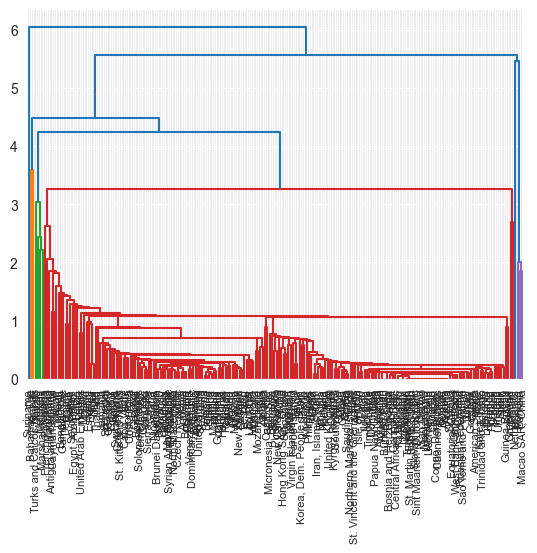

In [402]:
merging = linkage(X, method='single')

dendrogram(merging, labels=df.index, leaf_rotation=90, leaf_font_size=8)
plt.show()

In [403]:
clusters = fcluster(merging, 6, criterion='distance')
print(clusters)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [404]:
df['label'] = clusters
print(df.sort_values('label')['label'])

Country
Afghanistan              1
Albania                  1
Algeria                  1
American Samoa           1
Andorra                  1
                        ..
Virgin Islands (U.S.)    1
West Bank and Gaza       1
Yemen, Rep.              1
Zimbabwe                 1
Suriname                 2
Name: label, Length: 214, dtype: int32


In [405]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
labels = kmeans.predict(X)

dict(zip(df.index, labels))

{'Afghanistan': np.int32(2),
 'Albania': np.int32(2),
 'Algeria': np.int32(0),
 'American Samoa': np.int32(2),
 'Andorra': np.int32(2),
 'Angola': np.int32(2),
 'Antigua and Barbuda': np.int32(0),
 'Argentina': np.int32(0),
 'Armenia': np.int32(0),
 'Aruba': np.int32(2),
 'Australia': np.int32(0),
 'Austria': np.int32(2),
 'Azerbaijan': np.int32(2),
 'Bahamas, The': np.int32(1),
 'Bahrain': np.int32(1),
 'Bangladesh': np.int32(0),
 'Barbados': np.int32(0),
 'Belarus': np.int32(2),
 'Belgium': np.int32(2),
 'Belize': np.int32(2),
 'Benin': np.int32(2),
 'Bermuda': np.int32(2),
 'Bhutan': np.int32(2),
 'Bolivia': np.int32(0),
 'Bosnia and Herzegovina': np.int32(2),
 'Botswana': np.int32(0),
 'Brazil': np.int32(0),
 'Brunei Darussalam': np.int32(0),
 'Bulgaria': np.int32(0),
 'Burkina Faso': np.int32(2),
 'Burundi': np.int32(0),
 'Cambodia': np.int32(2),
 'Cameroon': np.int32(2),
 'Canada': np.int32(0),
 'Cabo Verde': np.int32(0),
 'Cayman Islands': np.int32(0),
 'Central African Republic

In [406]:
pd.Series(labels).value_counts().sort_index()

0     79
1     13
2    122
Name: count, dtype: int64

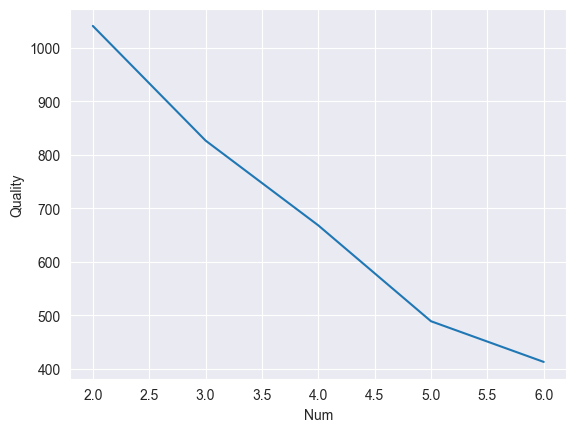

In [407]:
crit = []
for k in range(2, 7):
    kmeans = KMeans(n_clusters=k, random_state=15)
    kmeans.fit(X)
    crit.append(kmeans.inertia_)

plt.plot(range(2,7), crit)
plt.xlabel('Num')
plt.ylabel('Quality')
plt.show()

In [408]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
labels = kmeans.predict(X)

pd.DataFrame(labels, df.index)

,0
Country,
Afghanistan,1
Albania,4
Algeria,1
American Samoa,1
Andorra,1
...,...
Virgin Islands (U.S.),1
West Bank and Gaza,1
"Yemen, Rep.",1


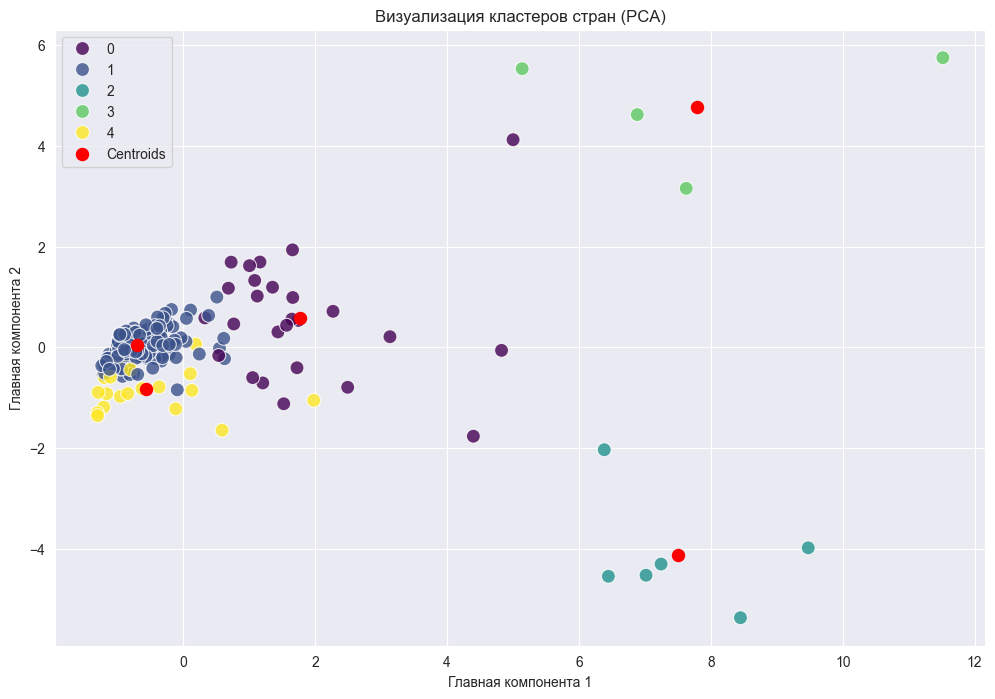

In [409]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

centroids_pca = pca.transform(kmeans.cluster_centers_)

plt.figure(figsize=(12, 8))

sns.scatterplot(
    x=X_pca[:, 0],
    y=X_pca[:, 1],
    hue=labels,
    palette='viridis',
    s=100,
    alpha=0.8
)

plt.scatter(
    centroids_pca[:, 0],
    centroids_pca[:, 1],
    marker='.',
    s=300,
    c='red',
    label='Centroids'
)

plt.title('Визуализация кластеров стран (PCA)')
plt.xlabel('Главная компонента 1')
plt.ylabel('Главная компонента 2')
plt.legend()
plt.grid(True)
plt.show()

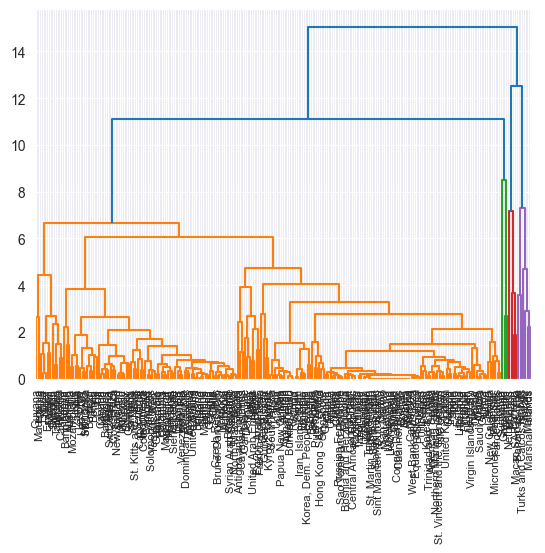

In [410]:
merging = linkage(X, method='complete')

dendrogram(merging, labels=df.index, leaf_rotation=90, leaf_font_size=8)
plt.show()

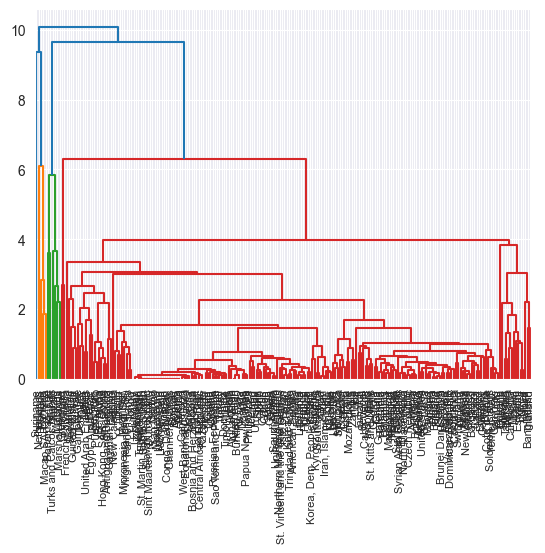

In [414]:
merging = linkage(X, method='average')

dendrogram(merging, labels=df.index, leaf_rotation=90, leaf_font_size=8)
plt.show()

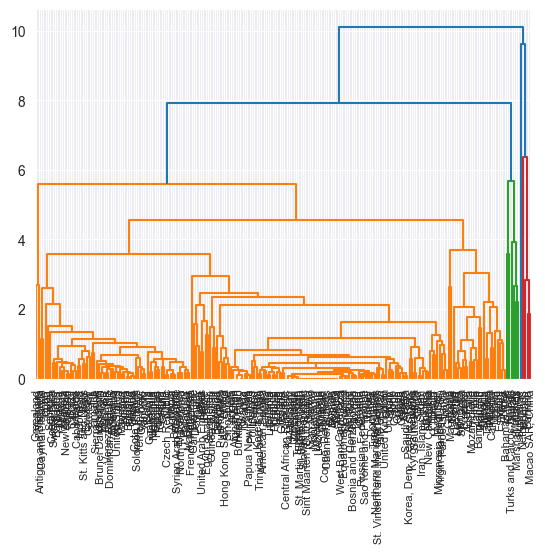

In [412]:
merging = linkage(X, method='weighted')

dendrogram(merging, labels=df.index, leaf_rotation=90, leaf_font_size=8)
plt.show()